In [120]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("coursework_other(1).csv")

In [82]:
len(df)

9568

In [83]:
df = df.dropna()

In [84]:
len(df)

9568

In [85]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [86]:
y = np.array(y)

In [87]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

In [88]:
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.reshape(len(y),1)).reshape(-1)

In [89]:
y

array([0.56953642, 0.31933775, 0.90463576, ..., 0.12331126, 0.20503311,
       0.43735099])

In [90]:
X.shape

(9568, 4)

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer,r2_score

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

Train Random Forest...
Best parameters found:  {'n_estimators': 129, 'max_depth': None, 'criterion': 'poisson'}
0.0017482190367258854
0.030903495720431193
0.9673880288079497
9.965285564096728
2.3332139268925554
0.9673880288079497


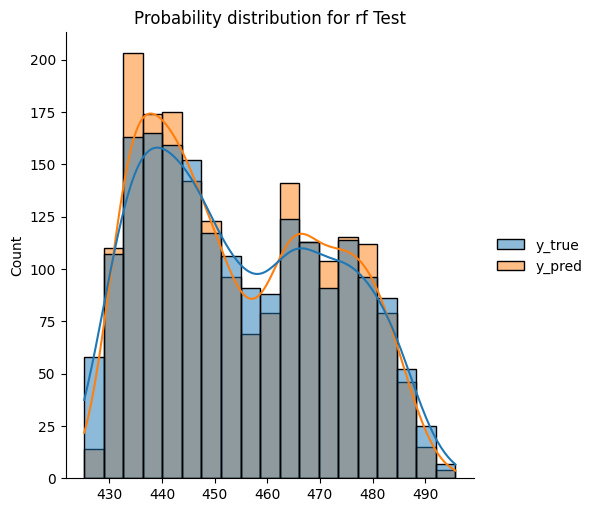

In [121]:
print('Train Random Forest...')
method = "rf"
from sklearn.model_selection import RandomizedSearchCV
clf = RandomForestRegressor()
param_dist = {
    "n_estimators": np.random.randint(1, 200, size=10),
    "criterion": ["poisson", "squared_error"],
    "max_depth": [None] + list(np.random.randint(1, 8, size=7)),
}
# 随机搜索
search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=25,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
)

# 拟合数据
search.fit(X_train, y_train)
df = pd.DataFrame(search.cv_results_)
df.to_csv(f"{method}_cv_result.csv")
# 输出最佳参数
print("Best parameters found: ", search.best_params_)
clf = search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))
print(r2_score(y_pred=y_pred,y_true=y_test))
y_pred = y_scaler.inverse_transform(y_pred.reshape(len(y_pred),1))
y_test_ = y_scaler.inverse_transform(y_test.reshape(len(y_test),1))
print(mean_squared_error(y_pred=y_pred,y_true=y_test_))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test_))
print(r2_score(y_pred=y_pred,y_true=y_test_))
import pickle
with open(f"{method}.pkl","wb") as f:
    pickle.dump(clf,f)
d = {
    "y_true":y_test_.reshape(-1),
    "y_pred":y_pred.reshape(-1)
}
ax = sns.displot(d,kde=True)
plt.title(f'Probability distribution for {method} Test')
plt.show()

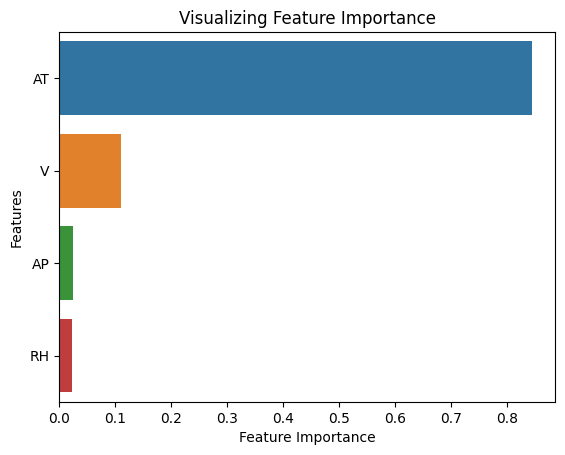

In [122]:
feature_importance_df = pd.DataFrame({
    "features":["AT","V","AP","RH"],
    "importance":clf.feature_importances_
})
# 按特征重要性值降序排序
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# 使用Seaborn创建条形图
ax = sns.barplot(x='importance', y='features', data=feature_importance_df)

ax.set(xlabel='Feature Importance', ylabel='Features')
plt.title('Visualizing Feature Importance')
plt.show()

Train KNN...
Best parameters found:  {'n_neighbors': 5}
0.0022697834809624704
0.035350481291563735
0.957658558831409
12.938333287356325
2.6689613375130623
0.957658558831409


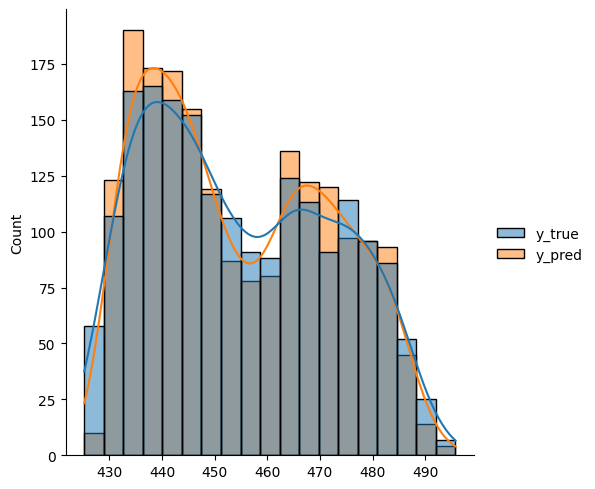

In [108]:
print('Train KNN...')
method = "knn_1"
from sklearn.model_selection import RandomizedSearchCV
clf = KNeighborsRegressor()
from scipy.stats import randint
param_dist = {
    'n_neighbors': randint(1, 50)
}
# 随机搜索
search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=25,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
)

# 拟合数据
search.fit(X_train, y_train)
df = pd.DataFrame(search.cv_results_)
df.to_csv(f"{method}_cv_result.csv")
# 输出最佳参数
print("Best parameters found: ", search.best_params_)
clf = search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))
print(r2_score(y_pred=y_pred,y_true=y_test))
y_pred = y_scaler.inverse_transform(y_pred.reshape(len(y_pred),1))
y_test_ = y_scaler.inverse_transform(y_test.reshape(len(y_test),1))
print(mean_squared_error(y_pred=y_pred,y_true=y_test_))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test_))
print(r2_score(y_pred=y_pred,y_true=y_test_))
import pickle
with open(f"{method}.pkl","wb") as f:
    pickle.dump(clf,f)
d = {
    "y_true":y_test_.reshape(-1),
    "y_pred":y_pred.reshape(-1)
}
sns.displot(d,kde=True)

Train SVM ...
Best parameters found:  {'C': 8, 'epsilon': 0.02730797480691171, 'gamma': 3.6751664595593203, 'shrinking': False}
0.0025558845350836714
0.03917321395763488
0.9523215163104158
14.569180821110711
2.9575776538014353
0.9523215163104158


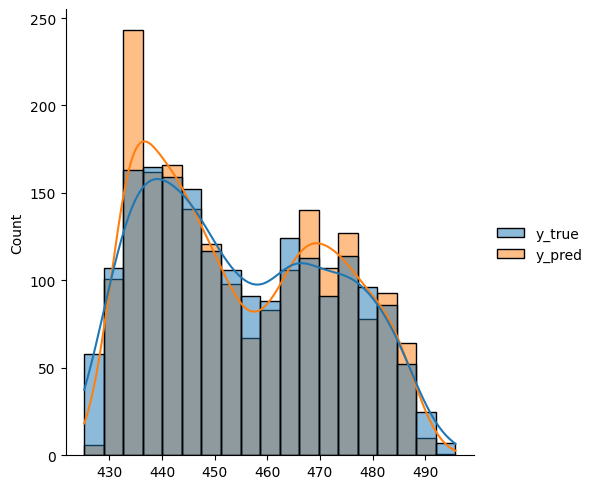

In [123]:
print('Train SVM ...')
method = "svm"
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
clf = SVR()
from scipy.stats import uniform
param_dist = {
    'C': range(1, 20),
    'shrinking': [True, False],
    'gamma': ['scale', 'auto'] + list(uniform(0.1, 5).rvs(size=10)),
    'epsilon': uniform(0.01, 1)
}
# 随机搜索
search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=25,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
)

# 拟合数据
search.fit(X_train, y_train)
df = pd.DataFrame(search.cv_results_)
df.to_csv(f"{method}_cv_result.csv")
# 输出最佳参数
print("Best parameters found: ", search.best_params_)
clf = search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))
print(r2_score(y_pred=y_pred,y_true=y_test))
y_pred = y_scaler.inverse_transform(y_pred.reshape(len(y_pred),1))
y_test_ = y_scaler.inverse_transform(y_test.reshape(len(y_test),1))
print(mean_squared_error(y_pred=y_pred,y_true=y_test_))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test_))
print(r2_score(y_pred=y_pred,y_true=y_test_))
import pickle
with open(f"{method}.pkl","wb") as f:
    pickle.dump(clf,f)
d = {
    "y_true":y_test_.reshape(-1),
    "y_pred":y_pred.reshape(-1)
}
sns.displot(d,kde=True)

In [ ]:
feature_importance_df = pd.DataFrame({
    "features":["AT","V","AP","RH"],
    "importance":clf.feature_importances_
})
# 按特征重要性值降序排序
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# 使用Seaborn创建条形图
ax = sns.barplot(x='importance', y='features', data=feature_importance_df)

ax.set(xlabel='Feature Importance', ylabel='Features')
plt.title('Visualizing Feature Importance')
plt.show()

Train BaseLine ...
0.05368310346420917
0.2011212488263869
-0.0014259008147110563
306.0071105218583
15.184654286392213
-0.0014259008147110563


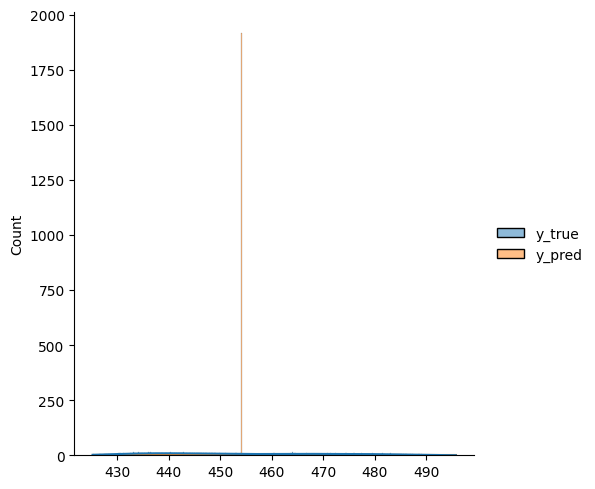

In [107]:
print('Train BaseLine ...')
method = "baseline"
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RandomizedSearchCV
clf = DummyRegressor()
# 拟合数据
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test))
print(r2_score(y_pred=y_pred,y_true=y_test))
y_pred = y_scaler.inverse_transform(y_pred.reshape(len(y_pred),1))
y_test_ = y_scaler.inverse_transform(y_test.reshape(len(y_test),1))
print(mean_squared_error(y_pred=y_pred,y_true=y_test_))
print(mean_absolute_error(y_pred=y_pred,y_true=y_test_))
print(r2_score(y_pred=y_pred,y_true=y_test_))
import pickle
with open(f"{method}.pkl","wb") as f:
    pickle.dump(clf,f)
d = {
    "y_true":y_test_.reshape(-1),
    "y_pred":y_pred.reshape(-1)
}
sns.displot(d,kde=True)